Budget used: 48.0%
Budget remaining: 52.0%
Years remaining: 6.5


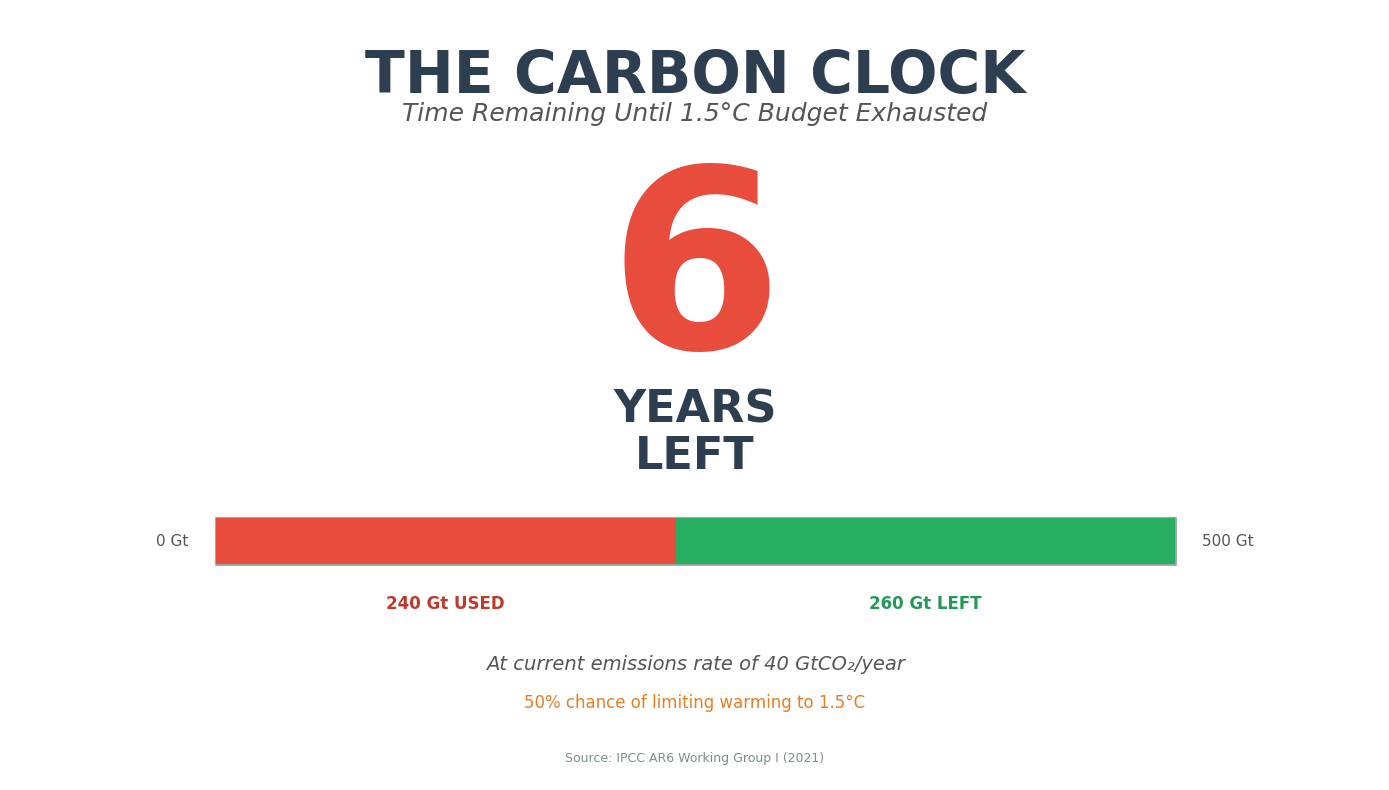

✓ Visualization 1 saved: visualizations/carbon_budget_countdown.png


In [2]:
# ============================================
# VISUALIZATION 1: CARBON BUDGET COUNTDOWN
# Style: Bold number with horizontal progress bar
# ============================================

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
import numpy as np

# Carbon budget calculation
carbon_budget_2020 = 500  # GtCO2 (IPCC AR6)
annual_emissions = 40     # GtCO2 per year
years_since_2020 = 2026 - 2020

emissions_since_2020 = annual_emissions * years_since_2020
remaining_budget = carbon_budget_2020 - emissions_since_2020
years_remaining = remaining_budget / annual_emissions

# Calculate percentage used
pct_used = (emissions_since_2020 / carbon_budget_2020) * 100
pct_remaining = 100 - pct_used

print(f"Budget used: {pct_used:.1f}%")
print(f"Budget remaining: {pct_remaining:.1f}%")
print(f"Years remaining: {years_remaining:.1f}")

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# Title
ax.text(0.5, 0.95, 'THE CARBON CLOCK', 
        ha='center', va='top', fontsize=42, fontweight='bold',
        color='#2c3e50')

# Subtitle
ax.text(0.5, 0.88, 'Time Remaining Until 1.5°C Budget Exhausted', 
        ha='center', va='top', fontsize=18,
        color='#555555', style='italic')

# Main countdown number - HUGE
ax.text(0.5, 0.65, f'{years_remaining:.0f}', 
        ha='center', va='center', fontsize=180, fontweight='bold',
        color='#e74c3c')  # Red color for urgency

# "YEARS LEFT" text
ax.text(0.5, 0.48, 'YEARS', 
        ha='center', va='center', fontsize=32, fontweight='bold',
        color='#2c3e50') #letterSpacing=2

ax.text(0.5, 0.42, 'LEFT', 
        ha='center', va='center', fontsize=32, fontweight='bold',
        color='#2c3e50')

# Progress bar showing budget depletion
bar_y = 0.28
bar_height = 0.06
bar_left = 0.15
bar_width = 0.7

# Background (total budget)
bg_rect = Rectangle((bar_left, bar_y), bar_width, bar_height,
                     facecolor='#ecf0f1', edgecolor='#95a5a6', linewidth=2)
ax.add_patch(bg_rect)

# Used budget (red)
used_width = bar_width * (pct_used / 100)
used_rect = Rectangle((bar_left, bar_y), used_width, bar_height,
                       facecolor='#e74c3c', edgecolor='none')
ax.add_patch(used_rect)

# Remaining budget (green)
remaining_rect = Rectangle((bar_left + used_width, bar_y), 
                           bar_width - used_width, bar_height,
                           facecolor='#27ae60', edgecolor='none')
ax.add_patch(remaining_rect)

# Progress bar labels
ax.text(bar_left - 0.02, bar_y + bar_height/2, '0 Gt', 
        ha='right', va='center', fontsize=11, color='#555')
ax.text(bar_left + bar_width + 0.02, bar_y + bar_height/2, '500 Gt', 
        ha='left', va='center', fontsize=11, color='#555')

# Budget used/remaining text
ax.text(bar_left + used_width/2, bar_y - 0.04, 
        f'{emissions_since_2020:.0f} Gt USED', 
        ha='center', va='top', fontsize=12, fontweight='bold',
        color='#c0392b')

ax.text(bar_left + used_width + (bar_width - used_width)/2, bar_y - 0.04, 
        f'{remaining_budget:.0f} Gt LEFT', 
        ha='center', va='top', fontsize=12, fontweight='bold',
        color='#229954')

# Bottom explanatory text
explanation = "At current emissions rate of 40 GtCO₂/year"
ax.text(0.5, 0.15, explanation, 
        ha='center', va='center', fontsize=14,
        color='#555555', style='italic')

# Warning text
warning = "50% chance of limiting warming to 1.5°C"
ax.text(0.5, 0.10, warning, 
        ha='center', va='center', fontsize=12,
        color='#e67e22')

# Data source
ax.text(0.5, 0.02, 'Source: IPCC AR6 Working Group I (2021)', 
        ha='center', va='bottom', fontsize=9,
        color='#7f8c8d')

plt.tight_layout()
#plt.savefig('visualizations/carbon_budget_countdown.png', dpi=300, bbox_inches='tight',
#            facecolor='white', edgecolor='none')
plt.show()

print("✓ Visualization 1 saved: visualizations/carbon_budget_countdown.png")

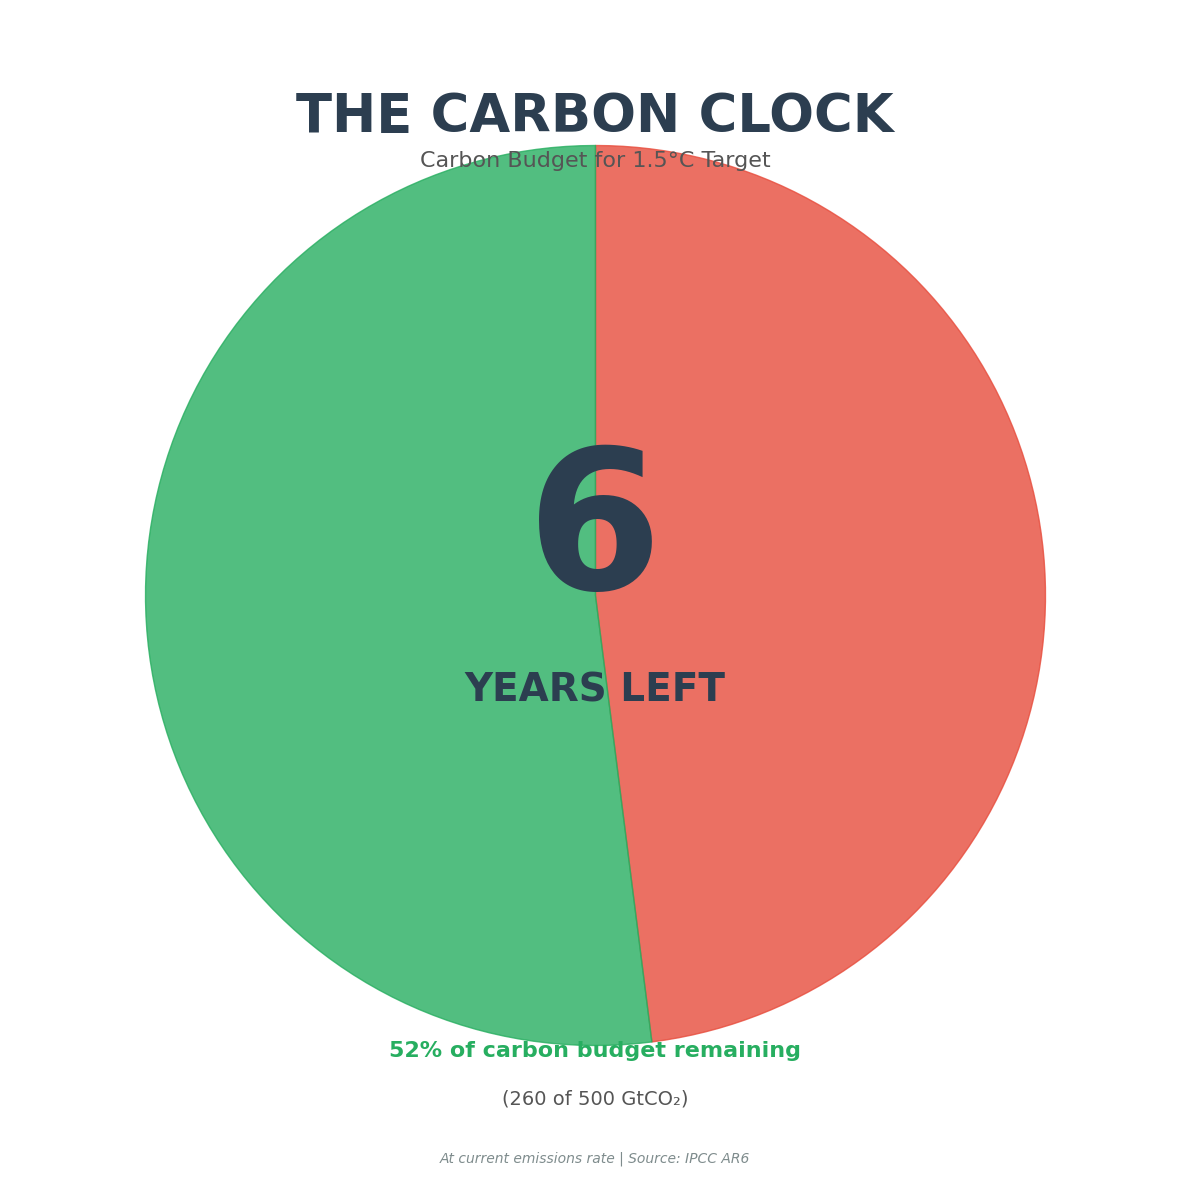

In [3]:
# ============================================
# VISUALIZATION 1: CARBON BUDGET COUNTDOWN
# Style: Circular gauge (like a clock running out)
# ============================================

import matplotlib.pyplot as plt
import numpy as np

# Carbon budget calculation
carbon_budget_2020 = 500
annual_emissions = 40
years_since_2020 = 2026 - 2020

emissions_since_2020 = annual_emissions * years_since_2020
remaining_budget = carbon_budget_2020 - emissions_since_2020
years_remaining = remaining_budget / annual_emissions

pct_remaining = (remaining_budget / carbon_budget_2020) * 100

# Create figure
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))

# Convert percentage to radians (start from top, go clockwise)
theta = np.linspace(0, 2 * np.pi, 100)
theta_used = np.linspace(0, 2 * np.pi * (1 - pct_remaining/100), 100)
theta_remaining = np.linspace(2 * np.pi * (1 - pct_remaining/100), 2 * np.pi, 100)

# Radius for the gauge
r = np.ones_like(theta)

# Plot used budget (red)
ax.fill_between(theta_used, 0, 1, color='#e74c3c', alpha=0.8)

# Plot remaining budget (green)
ax.fill_between(theta_remaining, 0, 1, color='#27ae60', alpha=0.8)

# Configure polar plot
ax.set_theta_zero_location('N')  # Start from top
ax.set_theta_direction(-1)  # Clockwise
ax.set_ylim(0, 1.3)
ax.set_yticks([])
ax.set_xticks([])
ax.spines['polar'].set_visible(False)

# Add center text
fig.text(0.5, 0.55, f'{years_remaining:.0f}', 
         ha='center', va='center', fontsize=140, fontweight='bold',
         color='#2c3e50')
fig.text(0.5, 0.42, 'YEARS LEFT', 
         ha='center', va='center', fontsize=28, fontweight='bold',
         color='#2c3e50')

# Title
fig.text(0.5, 0.92, 'THE CARBON CLOCK', 
         ha='center', va='top', fontsize=38, fontweight='bold',
         color='#2c3e50')

# Subtitle
fig.text(0.5, 0.87, 'Carbon Budget for 1.5°C Target', 
         ha='center', va='top', fontsize=16, color='#555555')

# Statistics at bottom
fig.text(0.5, 0.12, f'{pct_remaining:.0f}% of carbon budget remaining', 
         ha='center', va='center', fontsize=16, fontweight='bold',
         color='#27ae60')

fig.text(0.5, 0.08, f'({remaining_budget:.0f} of {carbon_budget_2020} GtCO₂)', 
         ha='center', va='center', fontsize=14, color='#555555')

fig.text(0.5, 0.03, 'At current emissions rate | Source: IPCC AR6', 
         ha='center', va='center', fontsize=10, color='#7f8c8d',
         style='italic')

plt.tight_layout()
#plt.savefig('visualizations/carbon_budget_countdown_circular.png', dpi=300, 
#            bbox_inches='tight', facecolor='white')
plt.show()

#print("✓ Visualization 1 saved: visualizations/carbon_budget_countdown_circular.png")

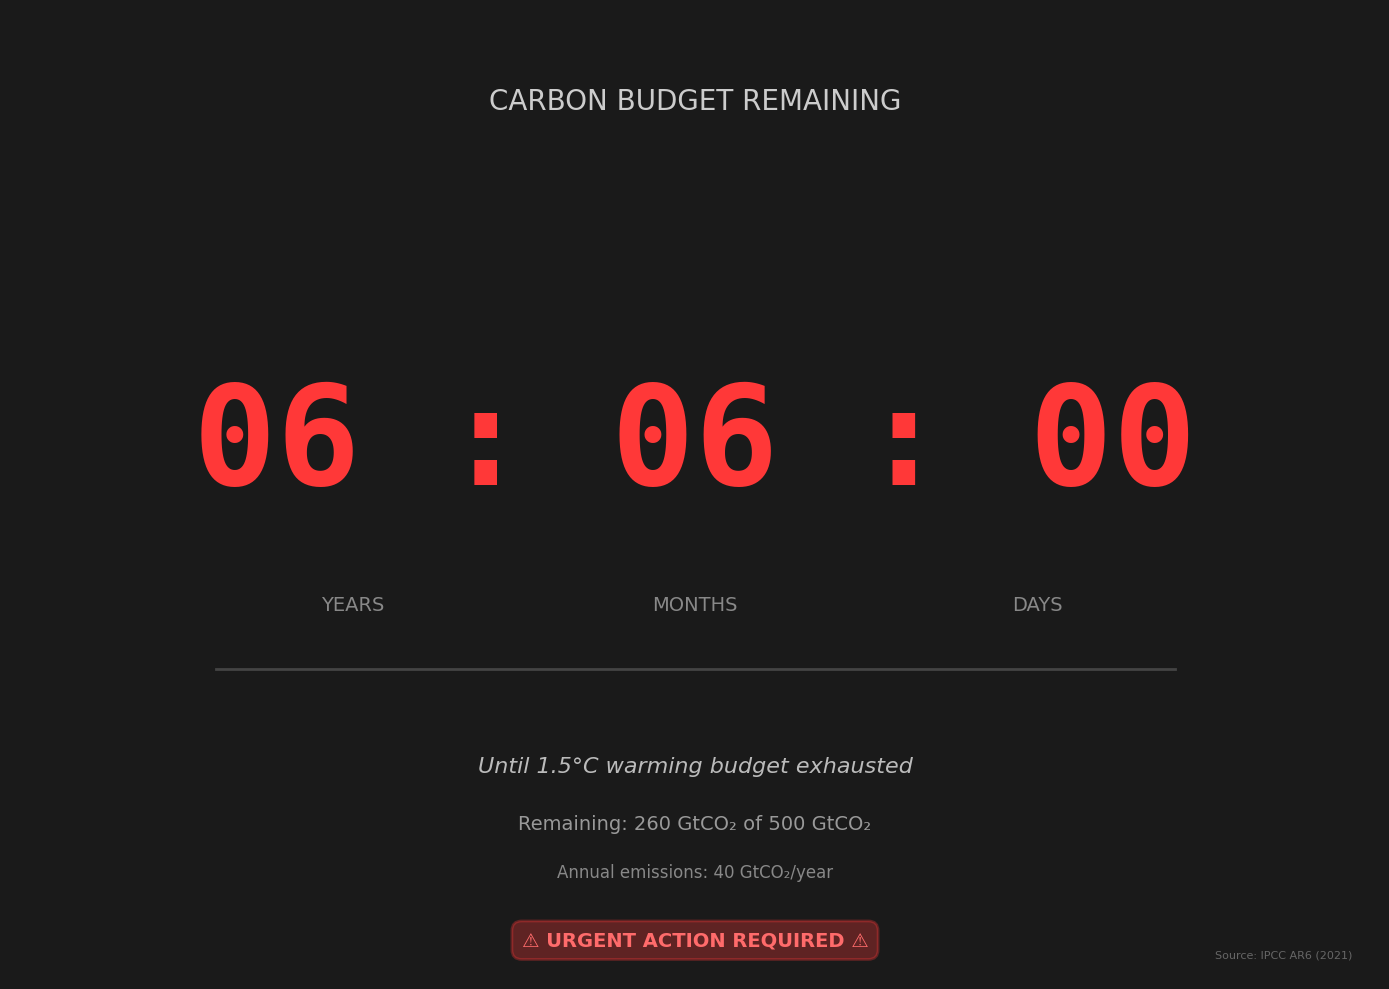

In [6]:
# ============================================
# VISUALIZATION 1: CARBON BUDGET COUNTDOWN
# Style: Minimalist countdown (like a digital clock)
# ============================================

import matplotlib.pyplot as plt

# Carbon budget calculation
carbon_budget_2020 = 500
annual_emissions = 40
years_since_2020 = 2026 - 2020

emissions_since_2020 = annual_emissions * years_since_2020
remaining_budget = carbon_budget_2020 - emissions_since_2020
years_remaining = remaining_budget / annual_emissions

# Create figure with black background for drama
fig, ax = plt.subplots(figsize=(14, 10), facecolor='#1a1a1a')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
ax.set_facecolor('#1a1a1a')

# Small header
ax.text(0.5, 0.92, 'CARBON BUDGET REMAINING', 
        ha='center', va='top', fontsize=20, 
        color='#cccccc') #letterSpacing=4

# Main countdown - digital clock style
# Years
years_int = int(years_remaining)
months_remaining = (years_remaining - years_int) * 12
months_int = int(months_remaining)
days_remaining = (months_remaining - months_int) * 30
days_int = int(days_remaining)

# Display as countdown timer
countdown_text = f'{years_int:02d} : {months_int:02d} : {days_int:02d}'
ax.text(0.5, 0.55, countdown_text, 
        ha='center', va='center', fontsize=100, fontweight='bold',
        color='#ff3838', family='monospace')

# Labels below numbers
label_y = 0.38
ax.text(0.25, label_y, 'YEARS', ha='center', fontsize=14, 
        color='#888888')
ax.text(0.5, label_y, 'MONTHS', ha='center', fontsize=14, 
        color='#888888')
ax.text(0.75, label_y, 'DAYS', ha='center', fontsize=14, 
        color='#888888')

# Horizontal line separator
ax.plot([0.15, 0.85], [0.32, 0.32], color='#444444', linewidth=2)

# Information text
ax.text(0.5, 0.22, 'Until 1.5°C warming budget exhausted', 
        ha='center', va='center', fontsize=16,
        color='#bbbbbb', style='italic')

ax.text(0.5, 0.16, f'Remaining: {remaining_budget:.0f} GtCO₂ of {carbon_budget_2020} GtCO₂', 
        ha='center', va='center', fontsize=14,
        color='#999999')

ax.text(0.5, 0.11, f'Annual emissions: {annual_emissions} GtCO₂/year', 
        ha='center', va='center', fontsize=12,
        color='#888888')

# Warning box
warning_y = 0.04
box_props = dict(boxstyle='round,pad=0.5', facecolor='#ff3838', alpha=0.3, 
                 edgecolor='#ff3838', linewidth=2)
ax.text(0.5, warning_y, '⚠ URGENT ACTION REQUIRED ⚠', 
        ha='center', va='center', fontsize=14, fontweight='bold',
        color='#ff6b6b', bbox=box_props)

# Data source (bottom corner)
ax.text(0.98, 0.02, 'Source: IPCC AR6 (2021)', 
        ha='right', va='bottom', fontsize=8,
        color='#666666')

plt.tight_layout()
#plt.savefig('visualizations/carbon_budget_countdown_minimalist.png', dpi=300, 
#            bbox_inches='tight', facecolor='#1a1a1a', edgecolor='none')
plt.show()

#print("✓ Visualization 1 saved: visualizations/carbon_budget_countdown_minimalist.png")

In [7]:
# ============================================
# CARBON BUDGET CALCULATIONS - PER SECOND
# ============================================

import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Global annual emissions data
annual_emissions_2023 = 37.4  # GtCO2 (Global Carbon Project 2023)
annual_emissions_gt = 37.4  # Gigatonnes CO2 per year

# Convert to tonnes per second
seconds_per_year = 365.25 * 24 * 60 * 60  # Account for leap years
tonnes_per_second = (annual_emissions_gt * 1e9) / seconds_per_year  # Convert Gt to tonnes

print("EMISSIONS RATE CALCULATION")
print("=" * 60)
print(f"Annual emissions (2023): {annual_emissions_gt} GtCO₂")
print(f"Seconds per year: {seconds_per_year:,.0f}")
print(f"Emissions per second: {tonnes_per_second:,.2f} tonnes CO₂")
print(f"Emissions per minute: {tonnes_per_second * 60:,.2f} tonnes CO₂")
print(f"Emissions per hour: {tonnes_per_second * 3600:,.2f} tonnes CO₂")
print(f"Emissions per day: {tonnes_per_second * 86400:,.2f} tonnes CO₂")
print("=" * 60)

# Carbon budget remaining (IPCC AR6, 2021 baseline)
# For 50% chance of staying under 1.5°C
carbon_budget_2020 = 500  # GtCO2
budget_start_date = datetime(2020, 1, 1)

# Calculate emissions since 2020
current_date = datetime(2026, 1, 16)  # Your project date
years_elapsed = (current_date - budget_start_date).total_seconds() / seconds_per_year
emissions_since_2020_gt = annual_emissions_gt * years_elapsed

# Remaining budget in gigatonnes
remaining_budget_gt = carbon_budget_2020 - emissions_since_2020_gt
remaining_budget_tonnes = remaining_budget_gt * 1e9  # Convert to tonnes

print("\nCARBON BUDGET STATUS")
print("=" * 60)
print(f"Original budget (Jan 2020): {carbon_budget_2020} GtCO₂")
print(f"Time elapsed: {years_elapsed:.2f} years")
print(f"Emissions since Jan 2020: {emissions_since_2020_gt:.1f} GtCO₂")
print(f"Remaining budget: {remaining_budget_gt:.1f} GtCO₂")
print(f"Remaining budget: {remaining_budget_tonnes:,.0f} tonnes CO₂")
print("=" * 60)

# Calculate time remaining
seconds_remaining = remaining_budget_tonnes / tonnes_per_second
time_remaining = timedelta(seconds=seconds_remaining)

# Break down into years, months, days, hours, minutes, seconds
total_seconds = int(seconds_remaining)
years = total_seconds // (365.25 * 24 * 3600)
remaining_after_years = total_seconds % (365.25 * 24 * 3600)
months = int(remaining_after_years // (30.44 * 24 * 3600))
remaining_after_months = remaining_after_years % (30.44 * 24 * 3600)
days = int(remaining_after_months // (24 * 3600))
remaining_after_days = remaining_after_months % (24 * 3600)
hours = int(remaining_after_days // 3600)
remaining_after_hours = remaining_after_days % 3600
minutes = int(remaining_after_hours // 60)
seconds = int(remaining_after_hours % 60)

print("\nTIME REMAINING UNTIL CARBON BUDGET EXHAUSTED")
print("=" * 60)
print(f"Total seconds remaining: {total_seconds:,}")
print(f"Countdown: {years} years, {months} months, {days} days")
print(f"           {hours} hours, {minutes} minutes, {seconds} seconds")
print("=" * 60)

EMISSIONS RATE CALCULATION
Annual emissions (2023): 37.4 GtCO₂
Seconds per year: 31,557,600
Emissions per second: 1,185.13 tonnes CO₂
Emissions per minute: 71,108.07 tonnes CO₂
Emissions per hour: 4,266,484.14 tonnes CO₂
Emissions per day: 102,395,619.44 tonnes CO₂

CARBON BUDGET STATUS
Original budget (Jan 2020): 500 GtCO₂
Time elapsed: 6.04 years
Emissions since Jan 2020: 226.0 GtCO₂
Remaining budget: 274.0 GtCO₂
Remaining budget: 274,012,867,899 tonnes CO₂

TIME REMAINING UNTIL CARBON BUDGET EXHAUSTED
Total seconds remaining: 231,208,248
Countdown: 7.0 years, 3 months, 27 days
           22 hours, 50 minutes, 0 seconds


AttributeError: 'Text' object has no property 'letterSpacing'

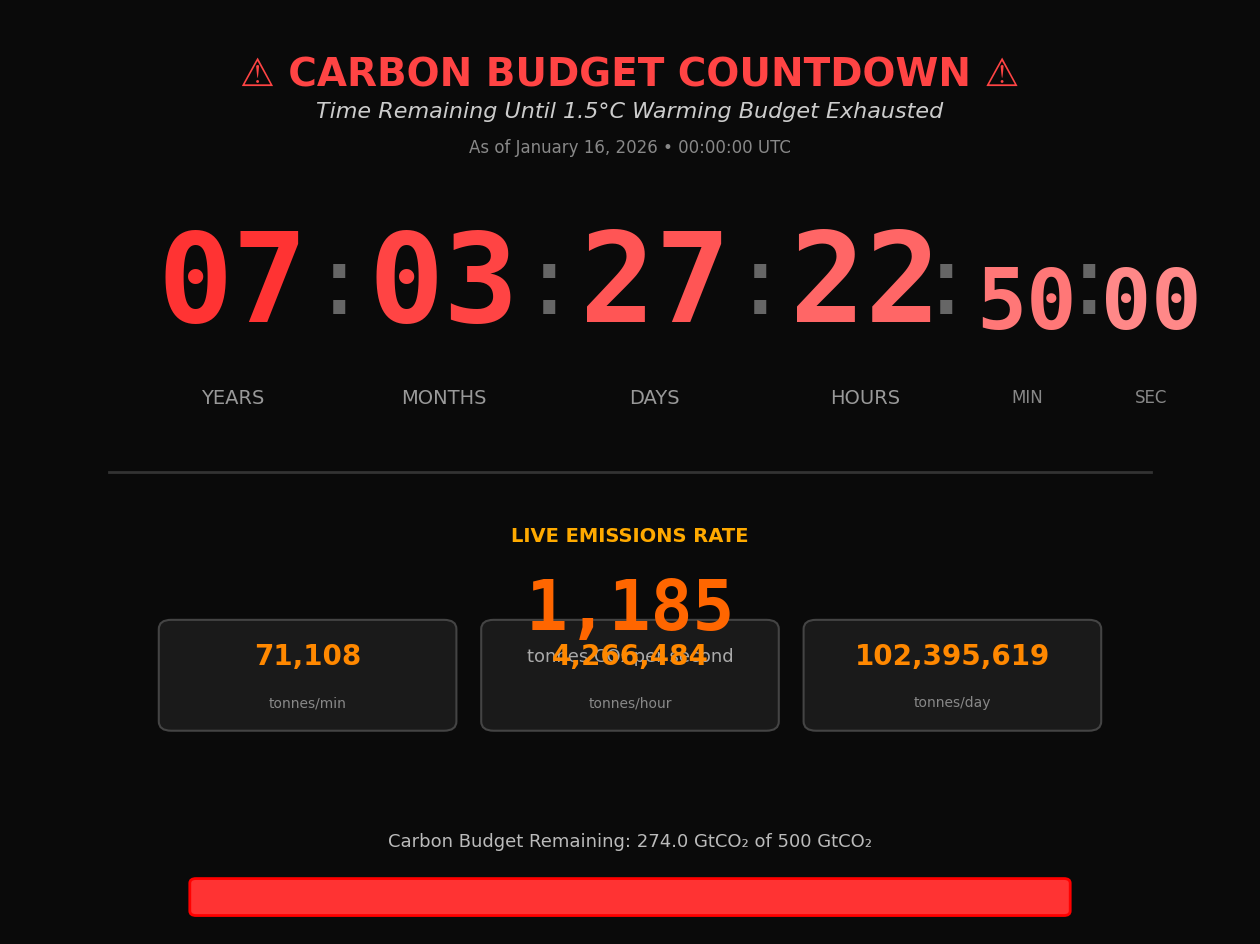

In [11]:
# ============================================
# STATIC VERSION - For PDF Report
# ============================================

import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

# Use the calculations from above
fig, ax = plt.subplots(figsize=(16, 12), facecolor='#0a0a0a')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
ax.set_facecolor('#0a0a0a')

# Header with pulsing effect simulation (using red glow)
header_y = 0.95
ax.text(0.5, header_y, '⚠ CARBON BUDGET COUNTDOWN ⚠', 
        ha='center', va='top', fontsize=28, fontweight='bold',
        color='#ff4444')

# Subheader
ax.text(0.5, 0.90, 'Time Remaining Until 1.5°C Warming Budget Exhausted', 
        ha='center', va='top', fontsize=16,
        color='#cccccc', style='italic')

# Current timestamp
timestamp = current_date.strftime('%B %d, %Y • %H:%M:%S UTC')
ax.text(0.5, 0.86, f'As of {timestamp}', 
        ha='center', va='top', fontsize=12,
        color='#888888')

# --- MAIN COUNTDOWN DISPLAY ---
countdown_y_start = 0.70

# Years
ax.text(0.18, countdown_y_start, f'{int(years):02d}', 
        ha='center', va='center', fontsize=90, fontweight='bold',
        color='#ff3333', family='monospace')
ax.text(0.18, countdown_y_start - 0.12, 'YEARS', 
        ha='center', va='center', fontsize=14,
        color='#999999')

# Months
ax.text(0.35, countdown_y_start, f'{months:02d}', 
        ha='center', va='center', fontsize=90, fontweight='bold',
        color='#ff4444', family='monospace')
ax.text(0.35, countdown_y_start - 0.12, 'MONTHS', 
        ha='center', va='center', fontsize=14,
        color='#999999')

# Days
ax.text(0.52, countdown_y_start, f'{days:02d}', 
        ha='center', va='center', fontsize=90, fontweight='bold',
        color='#ff5555', family='monospace')
ax.text(0.52, countdown_y_start - 0.12, 'DAYS', 
        ha='center', va='center', fontsize=14,
        color='#999999')

# Hours
ax.text(0.69, countdown_y_start, f'{hours:02d}', 
        ha='center', va='center', fontsize=90, fontweight='bold',
        color='#ff6666', family='monospace')
ax.text(0.69, countdown_y_start - 0.12, 'HOURS', 
        ha='center', va='center', fontsize=14,
        color='#999999')

# Minutes
ax.text(0.82, countdown_y_start - 0.02, f'{minutes:02d}', 
        ha='center', va='center', fontsize=60, fontweight='bold',
        color='#ff7777', family='monospace')
ax.text(0.82, countdown_y_start - 0.12, 'MIN', 
        ha='center', va='center', fontsize=12,
        color='#888888')

# Seconds  
ax.text(0.92, countdown_y_start - 0.02, f'{seconds:02d}', 
        ha='center', va='center', fontsize=60, fontweight='bold',
        color='#ff8888', family='monospace')
ax.text(0.92, countdown_y_start - 0.12, 'SEC', 
        ha='center', va='center', fontsize=12,
        color='#888888')

# Add colons between time units
colon_y = countdown_y_start
for x_pos in [0.265, 0.435, 0.605, 0.755, 0.87]:
    ax.text(x_pos, colon_y, ':', 
            ha='center', va='center', fontsize=70,
            color='#666666', family='monospace')

# Separator line
ax.plot([0.08, 0.92], [0.50, 0.50], color='#333333', linewidth=2)

# --- EMISSIONS TICKER ---
ticker_y = 0.43
ax.text(0.5, ticker_y, 'LIVE EMISSIONS RATE', 
        ha='center', va='center', fontsize=14, fontweight='bold',
        color='#ffaa00')

# Emissions per second (large)
ax.text(0.5, ticker_y - 0.08, f'{tonnes_per_second:,.0f}', 
        ha='center', va='center', fontsize=50, fontweight='bold',
        color='#ff6600', family='monospace')
ax.text(0.5, ticker_y - 0.13, 'tonnes CO₂ per second', 
        ha='center', va='center', fontsize=13,
        color='#aaaaaa')

# Additional emission stats in boxes
stats_y = 0.23
box_width = 0.22
box_height = 0.10

# Per minute
box1 = FancyBboxPatch((0.13, stats_y), box_width, box_height,
                       boxstyle="round,pad=0.01", 
                       facecolor='#1a1a1a', edgecolor='#444444', linewidth=1.5)
ax.add_patch(box1)
ax.text(0.24, stats_y + 0.07, f'{tonnes_per_second * 60:,.0f}', 
        ha='center', va='center', fontsize=20, fontweight='bold',
        color='#ff8800')
ax.text(0.24, stats_y + 0.02, 'tonnes/min', 
        ha='center', va='center', fontsize=10,
        color='#888888')

# Per hour
box2 = FancyBboxPatch((0.39, stats_y), box_width, box_height,
                       boxstyle="round,pad=0.01", 
                       facecolor='#1a1a1a', edgecolor='#444444', linewidth=1.5)
ax.add_patch(box2)
ax.text(0.50, stats_y + 0.07, f'{tonnes_per_second * 3600:,.0f}', 
        ha='center', va='center', fontsize=20, fontweight='bold',
        color='#ff8800')
ax.text(0.50, stats_y + 0.02, 'tonnes/hour', 
        ha='center', va='center', fontsize=10,
        color='#888888')

# Per day
box3 = FancyBboxPatch((0.65, stats_y), box_width, box_height,
                       boxstyle="round,pad=0.01", 
                       facecolor='#1a1a1a', edgecolor='#444444', linewidth=1.5)
ax.add_patch(box3)
ax.text(0.76, stats_y + 0.07, f'{tonnes_per_second * 86400:,.0f}', 
        ha='center', va='center', fontsize=20, fontweight='bold',
        color='#ff8800')
ax.text(0.76, stats_y + 0.02, 'tonnes/day', 
        ha='center', va='center', fontsize=10,
        color='#888888')

# --- BUDGET INFORMATION ---
budget_y = 0.10
ax.text(0.5, budget_y, f'Carbon Budget Remaining: {remaining_budget_gt:.1f} GtCO₂ of {carbon_budget_2020} GtCO₂', 
        ha='center', va='center', fontsize=13,
        color='#bbbbbb')

# Warning banner
warning_y = 0.04
warning_box = FancyBboxPatch((0.15, warning_y - 0.015), 0.70, 0.03,
                             boxstyle="round,pad=0.005", 
                             facecolor='#ff3333', edgecolor='#ff0000', linewidth=2)
ax.add_patch(warning_box)
ax.text(0.5, warning_y, '⚠ EVERY SECOND COUNTS • URGENT CLIMATE ACTION REQUIRED ⚠', 
        ha='center', va='center', fontsize=11, fontweight='bold',
        color='#ffffff', letterSpacing=1)

# Data source
ax.text(0.02, 0.01, 'Sources: Global Carbon Project (2023), IPCC AR6 (2021)', 
        ha='left', va='bottom', fontsize=8,
        color='#666666')

ax.text(0.98, 0.01, f'Based on {annual_emissions_gt} GtCO₂/year emissions rate', 
        ha='right', va='bottom', fontsize=8,
        color='#666666')

plt.tight_layout()
plt.savefig('visualizations/carbon_budget_countdown.png', dpi=300, 
            bbox_inches='tight', facecolor='#0a0a0a', edgecolor='none')
plt.show()

print("✓ Static visualization saved: visualizations/carbon_budget_countdown.png")

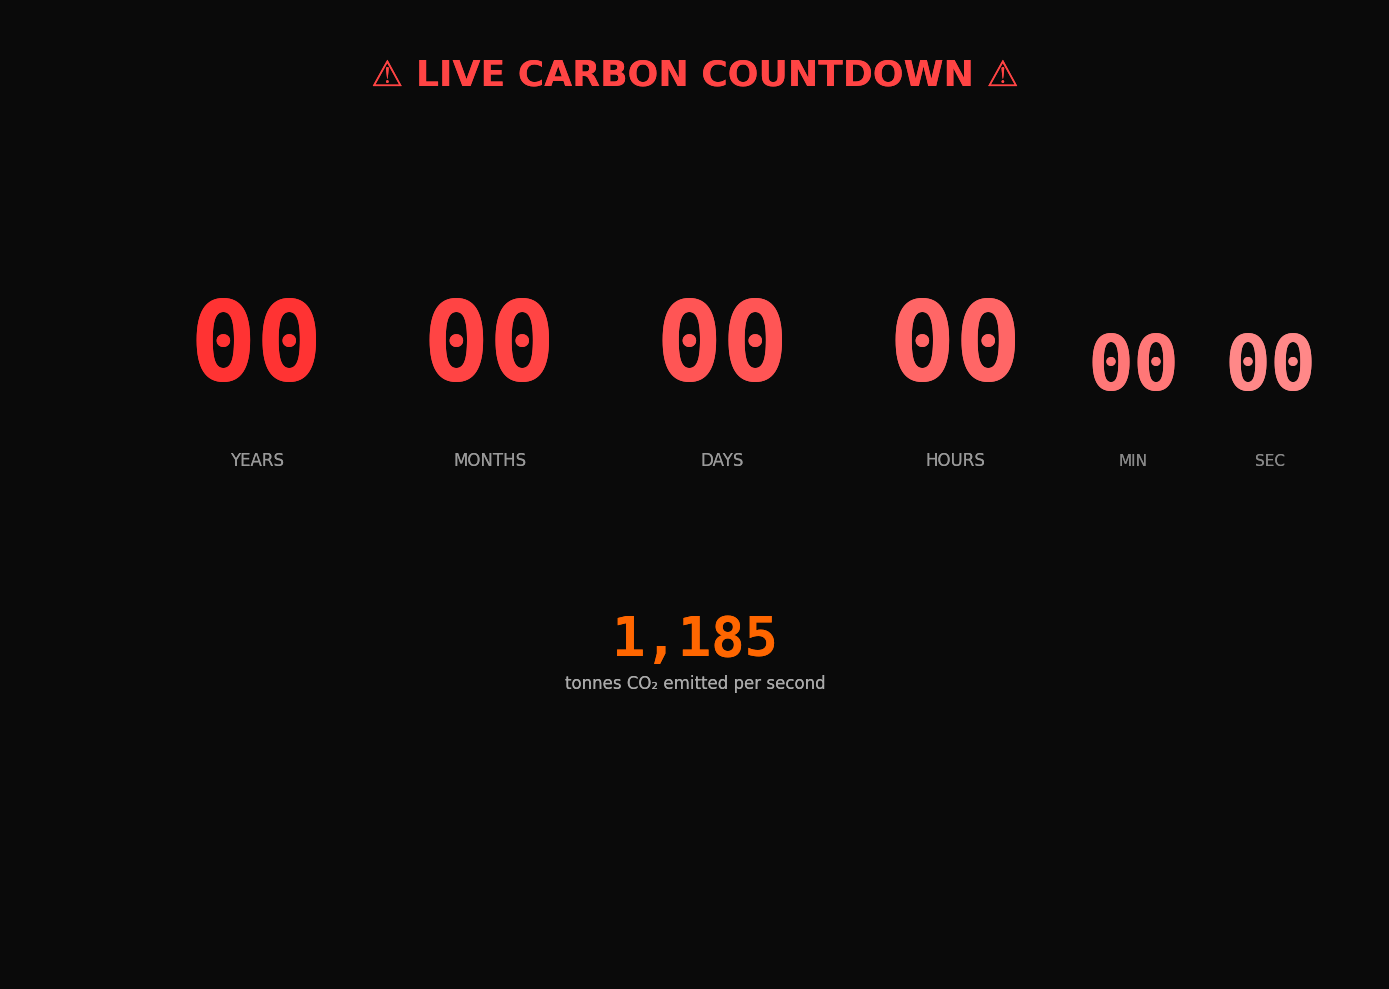

✓ Interactive countdown is running!
  (Close the window to stop)


In [12]:
# ============================================
# INTERACTIVE VERSION - Live Updating
# ============================================

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from datetime import datetime, timedelta

# Create figure
fig, ax = plt.subplots(figsize=(14, 10), facecolor='#0a0a0a')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
ax.set_facecolor('#0a0a0a')

# Store text objects for updating
text_objects = {}

def init():
    """Initialize the animation"""
    # Header
    ax.text(0.5, 0.95, '⚠ LIVE CARBON COUNTDOWN ⚠', 
            ha='center', va='top', fontsize=26, fontweight='bold',
            color='#ff4444')
    
    # Create text objects that will be updated
    text_objects['years'] = ax.text(0.18, 0.65, '00', 
                                    ha='center', va='center', fontsize=80, 
                                    fontweight='bold', color='#ff3333', family='monospace')
    text_objects['months'] = ax.text(0.35, 0.65, '00', 
                                     ha='center', va='center', fontsize=80, 
                                     fontweight='bold', color='#ff4444', family='monospace')
    text_objects['days'] = ax.text(0.52, 0.65, '00', 
                                   ha='center', va='center', fontsize=80, 
                                   fontweight='bold', color='#ff5555', family='monospace')
    text_objects['hours'] = ax.text(0.69, 0.65, '00', 
                                    ha='center', va='center', fontsize=80, 
                                    fontweight='bold', color='#ff6666', family='monospace')
    text_objects['minutes'] = ax.text(0.82, 0.63, '00', 
                                      ha='center', va='center', fontsize=55, 
                                      fontweight='bold', color='#ff7777', family='monospace')
    text_objects['seconds'] = ax.text(0.92, 0.63, '00', 
                                      ha='center', va='center', fontsize=55, 
                                      fontweight='bold', color='#ff8888', family='monospace')
    
    # Labels
    ax.text(0.18, 0.53, 'YEARS', ha='center', fontsize=12, color='#999999')
    ax.text(0.35, 0.53, 'MONTHS', ha='center', fontsize=12, color='#999999')
    ax.text(0.52, 0.53, 'DAYS', ha='center', fontsize=12, color='#999999')
    ax.text(0.69, 0.53, 'HOURS', ha='center', fontsize=12, color='#999999')
    ax.text(0.82, 0.53, 'MIN', ha='center', fontsize=11, color='#888888')
    ax.text(0.92, 0.53, 'SEC', ha='center', fontsize=11, color='#888888')
    
    # Emissions ticker
    text_objects['emissions'] = ax.text(0.5, 0.35, f'{tonnes_per_second:,.0f}', 
                                        ha='center', va='center', fontsize=40, 
                                        fontweight='bold', color='#ff6600', family='monospace')
    ax.text(0.5, 0.30, 'tonnes CO₂ emitted per second', 
            ha='center', fontsize=12, color='#aaaaaa')
    
    # Budget remaining (will be updated)
    text_objects['budget'] = ax.text(0.5, 0.20, '', 
                                     ha='center', fontsize=12, color='#bbbbbb')
    
    # Timestamp
    text_objects['timestamp'] = ax.text(0.5, 0.88, '', 
                                        ha='center', fontsize=11, color='#888888')
    
    return list(text_objects.values())

def update(frame):
    """Update function called for each frame"""
    # Calculate current budget and time
    elapsed_seconds = frame
    current_emissions = emissions_since_2020_gt + (tonnes_per_second * elapsed_seconds / 1e9)
    current_budget_gt = carbon_budget_2020 - current_emissions
    current_budget_tonnes = current_budget_gt * 1e9
    
    # Calculate time remaining
    seconds_left = current_budget_tonnes / tonnes_per_second
    
    # Break down into time units
    total_secs = int(seconds_left)
    yrs = total_secs // int(365.25 * 24 * 3600)
    remaining = total_secs % int(365.25 * 24 * 3600)
    mons = int(remaining // (30.44 * 24 * 3600))
    remaining = remaining % int(30.44 * 24 * 3600)
    dys = int(remaining // (24 * 3600))
    remaining = remaining % (24 * 3600)
    hrs = int(remaining // 3600)
    remaining = remaining % 3600
    mins = int(remaining // 60)
    secs = int(remaining % 60)
    
    # Update text objects
    text_objects['years'].set_text(f'{yrs:02d}')
    text_objects['months'].set_text(f'{mons:02d}')
    text_objects['days'].set_text(f'{dys:02d}')
    text_objects['hours'].set_text(f'{hrs:02d}')
    text_objects['minutes'].set_text(f'{mins:02d}')
    text_objects['seconds'].set_text(f'{secs:02d}')
    
    # Update budget
    text_objects['budget'].set_text(
        f'Budget Remaining: {current_budget_gt:.2f} GtCO₂ of {carbon_budget_2020} GtCO₂'
    )
    
    # Update timestamp
    current_time = datetime.now()
    text_objects['timestamp'].set_text(
        f'Live Update: {current_time.strftime("%H:%M:%S")}'
    )
    
    return list(text_objects.values())

# Create animation (updates every 1000ms = 1 second)
ani = animation.FuncAnimation(fig, update, init_func=init, 
                            frames=range(0, 3600),  # Run for 1 hour
                            interval=1000,  # Update every 1 second
                            blit=True, repeat=True)

plt.tight_layout()
plt.show()

print("✓ Interactive countdown is running!")
print("  (Close the window to stop)")

In [14]:
# ============================================
# SAVE INTERACTIVE HTML CARBON CLOCK
# ============================================

html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Carbon Clock - Live Countdown</title>
    <style>
        * {
            margin: 0;
            padding: 0;
            box-sizing: border-box;
        }
        
        body {
            background: #0a0a0a;
            color: #fff;
            font-family: 'Courier New', monospace;
            display: flex;
            flex-direction: column;
            align-items: center;
            justify-content: center;
            min-height: 100vh;
            padding: 20px;
        }
        
        .container {
            width: 100%;
            max-width: 1200px;
            text-align: center;
        }
        
        .header {
            margin-bottom: 20px;
        }
        
        .warning-title {
            font-size: 2em;
            color: #ff4444;
            font-weight: bold;
            letter-spacing: 3px;
            text-shadow: 0 0 20px rgba(255, 68, 68, 0.5);
            animation: pulse 2s infinite;
        }
        
        @keyframes pulse {
            0%, 100% { opacity: 1; }
            50% { opacity: 0.7; }
        }
        
        .subtitle {
            font-size: 1.1em;
            color: #ccc;
            font-style: italic;
            margin-top: 10px;
        }
        
        .timestamp {
            font-size: 0.9em;
            color: #888;
            margin-top: 10px;
        }
        
        .countdown-container {
            display: flex;
            justify-content: center;
            align-items: center;
            gap: 15px;
            margin: 50px 0;
            flex-wrap: wrap;
        }
        
        .time-unit {
            display: flex;
            flex-direction: column;
            align-items: center;
        }
        
        .time-value {
            font-size: 5em;
            font-weight: bold;
            font-family: 'Courier New', monospace;
            line-height: 1;
            min-width: 1.5ch;
        }
        
        .time-value.years { color: #ff3333; }
        .time-value.months { color: #ff4444; }
        .time-value.days { color: #ff5555; }
        .time-value.hours { color: #ff6666; }
        .time-value.minutes { color: #ff7777; font-size: 3.5em; }
        .time-value.seconds { color: #ff8888; font-size: 3.5em; }
        
        .time-label {
            font-size: 0.9em;
            color: #999;
            margin-top: 10px;
            letter-spacing: 2px;
        }
        
        .colon {
            font-size: 4em;
            color: #666;
            align-self: center;
            margin-bottom: 30px;
        }
        
        .separator {
            width: 80%;
            height: 2px;
            background: #333;
            margin: 40px auto;
        }
        
        .emissions-section {
            margin: 40px 0;
        }
        
        .emissions-title {
            font-size: 1.2em;
            color: #ffaa00;
            font-weight: bold;
            letter-spacing: 2px;
            margin-bottom: 20px;
        }
        
        .emissions-rate {
            font-size: 3.5em;
            color: #ff6600;
            font-weight: bold;
            margin: 10px 0;
        }
        
        .emissions-label {
            font-size: 1em;
            color: #aaa;
        }
        
        .stats-grid {
            display: grid;
            grid-template-columns: repeat(auto-fit, minmax(200px, 1fr));
            gap: 20px;
            margin: 30px 0;
        }
        
        .stat-box {
            background: #1a1a1a;
            border: 1.5px solid #444;
            border-radius: 10px;
            padding: 20px;
        }
        
        .stat-value {
            font-size: 1.5em;
            color: #ff8800;
            font-weight: bold;
            margin-bottom: 5px;
        }
        
        .stat-label {
            font-size: 0.85em;
            color: #888;
        }
        
        .budget-info {
            font-size: 1em;
            color: #bbb;
            margin: 30px 0;
        }
        
        .warning-banner {
            background: #ff3333;
            border: 2px solid #ff0000;
            border-radius: 10px;
            padding: 15px;
            margin: 30px 0;
            font-size: 0.95em;
            font-weight: bold;
            color: #fff;
            letter-spacing: 1px;
        }
        
        .footer {
            font-size: 0.75em;
            color: #666;
            margin-top: 30px;
        }
        
        @media (max-width: 768px) {
            .time-value { font-size: 3em; }
            .time-value.minutes, .time-value.seconds { font-size: 2.5em; }
            .colon { font-size: 2.5em; }
            .emissions-rate { font-size: 2.5em; }
        }
    </style>
</head>
<body>
    <div class="container">
        <div class="header">
            <div class="warning-title">⚠ CARBON BUDGET COUNTDOWN ⚠</div>
            <div class="subtitle">Time Remaining Until 1.5°C Warming Budget Exhausted</div>
            <div class="timestamp" id="timestamp">Loading...</div>
        </div>
        
        <div class="countdown-container">
            <div class="time-unit">
                <div class="time-value years" id="years">00</div>
                <div class="time-label">YEARS</div>
            </div>
            <div class="colon">:</div>
            <div class="time-unit">
                <div class="time-value months" id="months">00</div>
                <div class="time-label">MONTHS</div>
            </div>
            <div class="colon">:</div>
            <div class="time-unit">
                <div class="time-value days" id="days">00</div>
                <div class="time-label">DAYS</div>
            </div>
            <div class="colon">:</div>
            <div class="time-unit">
                <div class="time-value hours" id="hours">00</div>
                <div class="time-label">HOURS</div>
            </div>
            <div class="colon">:</div>
            <div class="time-unit">
                <div class="time-value minutes" id="minutes">00</div>
                <div class="time-label">MIN</div>
            </div>
            <div class="colon">:</div>
            <div class="time-unit">
                <div class="time-value seconds" id="seconds">00</div>
                <div class="time-label">SEC</div>
            </div>
        </div>
        
        <div class="separator"></div>
        
        <div class="emissions-section">
            <div class="emissions-title">LIVE EMISSIONS RATE</div>
            <div class="emissions-rate" id="emissionsRate">0</div>
            <div class="emissions-label">tonnes CO₂ per second</div>
        </div>
        
        <div class="stats-grid">
            <div class="stat-box">
                <div class="stat-value" id="perMinute">0</div>
                <div class="stat-label">tonnes/minute</div>
            </div>
            <div class="stat-box">
                <div class="stat-value" id="perHour">0</div>
                <div class="stat-label">tonnes/hour</div>
            </div>
            <div class="stat-box">
                <div class="stat-value" id="perDay">0</div>
                <div class="stat-label">tonnes/day</div>
            </div>
        </div>
        
        <div class="budget-info" id="budgetInfo">Loading budget information...</div>
        
        <div class="warning-banner">
            ⚠ EVERY SECOND COUNTS • URGENT CLIMATE ACTION REQUIRED ⚠
        </div>
        
        <div class="footer">
            Sources: Global Carbon Project (2023), IPCC AR6 (2021) | Based on 37.4 GtCO₂/year emissions rate
        </div>
    </div>
    
    <script>
        // Configuration
        const ANNUAL_EMISSIONS_GT = 37.4; // Gigatonnes CO2 per year
        const CARBON_BUDGET_2020_GT = 500; // Gigatonnes CO2
        const SECONDS_PER_YEAR = 365.25 * 24 * 60 * 60;
        const TONNES_PER_SECOND = (ANNUAL_EMISSIONS_GT * 1e9) / SECONDS_PER_YEAR;
        
        // Reference date: January 1, 2020
        const BUDGET_START = new Date('2020-01-01T00:00:00Z');
        
        function formatNumber(num) {
            return Math.round(num).toLocaleString();
        }
        
        function updateClock() {
            const now = new Date();
            
            // Calculate emissions since 2020
            const msElapsed = now - BUDGET_START;
            const secondsElapsed = msElapsed / 1000;
            const tonnesEmitted = TONNES_PER_SECOND * secondsElapsed;
            const gtEmitted = tonnesEmitted / 1e9;
            
            // Calculate remaining budget
            const remainingBudgetGt = CARBON_BUDGET_2020_GT - gtEmitted;
            const remainingBudgetTonnes = remainingBudgetGt * 1e9;
            
            // Calculate time remaining
            const secondsRemaining = remainingBudgetTonnes / TONNES_PER_SECOND;
            
            // Break down into time units
            let remaining = Math.floor(secondsRemaining);
            
            const years = Math.floor(remaining / (365.25 * 24 * 3600));
            remaining = remaining % (365.25 * 24 * 3600);
            
            const months = Math.floor(remaining / (30.44 * 24 * 3600));
            remaining = remaining % (30.44 * 24 * 3600);
            
            const days = Math.floor(remaining / (24 * 3600));
            remaining = remaining % (24 * 3600);
            
            const hours = Math.floor(remaining / 3600);
            remaining = remaining % 3600;
            
            const minutes = Math.floor(remaining / 60);
            const seconds = remaining % 60;
            
            // Update countdown display
            document.getElementById('years').textContent = String(years).padStart(2, '0');
            document.getElementById('months').textContent = String(months).padStart(2, '0');
            document.getElementById('days').textContent = String(days).padStart(2, '0');
            document.getElementById('hours').textContent = String(hours).padStart(2, '0');
            document.getElementById('minutes').textContent = String(minutes).padStart(2, '0');
            document.getElementById('seconds').textContent = String(seconds).padStart(2, '0');
            
            // Update emissions rate
            document.getElementById('emissionsRate').textContent = formatNumber(TONNES_PER_SECOND);
            document.getElementById('perMinute').textContent = formatNumber(TONNES_PER_SECOND * 60);
            document.getElementById('perHour').textContent = formatNumber(TONNES_PER_SECOND * 3600);
            document.getElementById('perDay').textContent = formatNumber(TONNES_PER_SECOND * 86400);
            
            // Update budget info
            const pctUsed = ((gtEmitted / CARBON_BUDGET_2020_GT) * 100).toFixed(1);
            document.getElementById('budgetInfo').textContent = 
                `Carbon Budget Remaining: ${remainingBudgetGt.toFixed(2)} GtCO₂ of ${CARBON_BUDGET_2020_GT} GtCO₂ (${(100 - pctUsed).toFixed(1)}% remaining)`;
            
            // Update timestamp
            const timeString = now.toLocaleString('en-US', { 
                timeZone: 'UTC',
                year: 'numeric',
                month: 'long', 
                day: 'numeric',
                hour: '2-digit', 
                minute: '2-digit', 
                second: '2-digit',
                hour12: false
            });
            document.getElementById('timestamp').textContent = `Live Update: ${timeString} UTC`;
        }
        
        // Update immediately and then every second
        updateClock();
        setInterval(updateClock, 1000);
    </script>
</body>
</html>
"""

# Save to file
with open('carbon.html', 'w', encoding='utf-8') as f:
    f.write(html_content)

print("✓ Interactive HTML clock saved: visualizations/carbon_clock_interactive.html")
print("  Open this file in your browser to see the live countdown!")

✓ Interactive HTML clock saved: visualizations/carbon_clock_interactive.html
  Open this file in your browser to see the live countdown!
